# WK03: Models

## Setup

This code imports the functions we need to run our inference pipelines

In [1]:
from PIL import Image
from transformers import pipeline

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%conda install pytorch torchvision torchaudio -c pytorch

Channels:
 - pytorch
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Text Completion

Let's use the GPT2 model to create some text completions:

In [3]:
TEXT_GEN_MODEL = "openai-community/gpt2"

Here we define some phrases that we'll use as sentence starters:

In [4]:
SEED_TEXTS = [
  "How much wood would a woodchuck chuck if ",
  "I once knew a man from Natucket, who ",
  "To be or not to be, "
]

We'll use a Transformers pipeline object to run inference:

In [5]:
generator = pipeline("text-generation", model=TEXT_GEN_MODEL)

Device set to use mps:0


Here we run the generator on all starter phrases:

In [6]:
for t in SEED_TEXTS:
  result = generator(t, max_length=24, pad_token_id=0)
  print(result[0]["generated_text"])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


How much wood would a woodchuck chuck if iced?  They wouldn't need it because it's hard
I once knew a man from Natucket, who iced to his own heart's content in the woods. The idea
To be or not to be,  it's the same thing - that is very important, but often overlooked.


#### Changing Model

is as easy as:

In [7]:
TEXT_GEN_MODEL = "Xenova/llama2.c-stories110M"
generator = pipeline("text-generation", model=TEXT_GEN_MODEL)

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.
Device set to use mps:0


Rerun with new model:

In [8]:
for t in SEED_TEXTS:
  result = generator(t, max_length=32, pad_token_id=0)
  print(result[0]["generated_text"])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


How much wood would a woodchuck chuck if 3 year old Timmy wanted to help. He was only three years old, but he was
I once knew a man from Natucket, who 3-years-old Jack. He was a very kind man and he always had a
To be or not to be, 3 year old Jack was playing in the park. He saw a big, red ball and he wanted to play with


One last model:

In [9]:
TEXT_GEN_MODEL = "facebook/opt-125m"
generator = pipeline("text-generation", model=TEXT_GEN_MODEL)

for t in SEED_TEXTS:
  result = generator(t, max_length=32, pad_token_id=0)
  print(result[0]["generated_text"])

Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


How much wood would a woodchuck chuck if                     
I once knew a man from Natucket, who                     
To be or not to be,  I have to be to be to be to to to to to to to to to to to to to to to


### Text Sentiment Analysis

Define model and create some example phrases:

In [10]:
TEXT_SENT_MODEL = "joeddav/distilbert-base-uncased-go-emotions-student"

EXAMPLE_TEXTS = [
  "What a wonderful day",
  "OMG my head hurts",
  "What am I doing here?"
]

Create inference pipeline object:

In [11]:
analyzer = pipeline("sentiment-analysis", model=TEXT_SENT_MODEL)

Device set to use mps:0


Run on example phrases

In [12]:
for t in EXAMPLE_TEXTS:
  result = analyzer(t)
  print(t, "->", result[0]["label"])

What a wonderful day -> joy
OMG my head hurts -> sadness
What am I doing here? -> confusion


We can also define our pipeline like this if we want to get scores for all possible sentiments:

In [13]:
full_analyzer = pipeline("sentiment-analysis", model=TEXT_SENT_MODEL, return_all_scores=True)

Device set to use mps:0
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [14]:
for t in EXAMPLE_TEXTS:
  result = full_analyzer(t)
  sorted_result = sorted(result[0], key=lambda A: A["score"], reverse=True)
  top_3_labels = [s["label"] for s in sorted_result[:3]]
  print(t, "->", top_3_labels)

What a wonderful day -> ['joy', 'optimism', 'excitement']
OMG my head hurts -> ['sadness', 'grief', 'disgust']
What am I doing here? -> ['confusion', 'curiosity', 'embarrassment']


### Image Description

New model definition/location:

In [15]:
IMAGE_CAP_MODEL = "Salesforce/blip-image-captioning-base"

A test image:

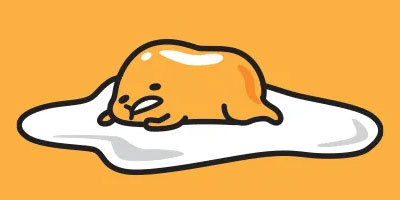

In [16]:
test_image = Image.open("./imgs/GDTM.jpg").convert("RGB")
display(test_image)

The inference object:

In [17]:
img_captioner = pipeline(task="image-to-text", model=IMAGE_CAP_MODEL)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use mps:0


Run inference:

In [18]:
result = img_captioner(test_image)
print(result[0]["generated_text"])

a cartoon character is laying on a fried egg


Other image description models:
- [`LLAVA`](https://huggingface.co/llava-hf/llava-interleave-qwen-0.5b-hf)
- [`VIT`](https://huggingface.co/nlpconnect/vit-gpt2-image-captioning)